# Importación de modulos

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from random import randint

# Creación de la data

Nos ayudamos de numpy, y la funcion random.randn()

In [ ]:
#Funcion lineal para no dispersar tanto la data
def linear(X,m,b):
  Y = m*X+b
  return Y

Conformación de la data

In [ ]:
# Para este ejemplo se contará con 500 datos (T)
T= 500
X = 10*(np.random.randn(T))
X2 = 15*(np.random.randn(T))
X3 = 20*(np.random.randn(T)+1)
Y = linear(X,75,20)+linear(X2,5,5)+linear(X3,10,2)

## Dataset : Termic_UFO_sys

Este dataset aleatorio xD cuenta con datos de temperatura en grados Centigrados (C°), frente a la temperatura a escala en una sistema de medición desconicido 'U', en grados (U°). El objetivo es poder predecir futuros valores en el sistema U para mantener estable un sistema termodinamico extraterrestre basado en la escala U, a partir de mediciones realizadas en grados centígrados, usando machine learning. 

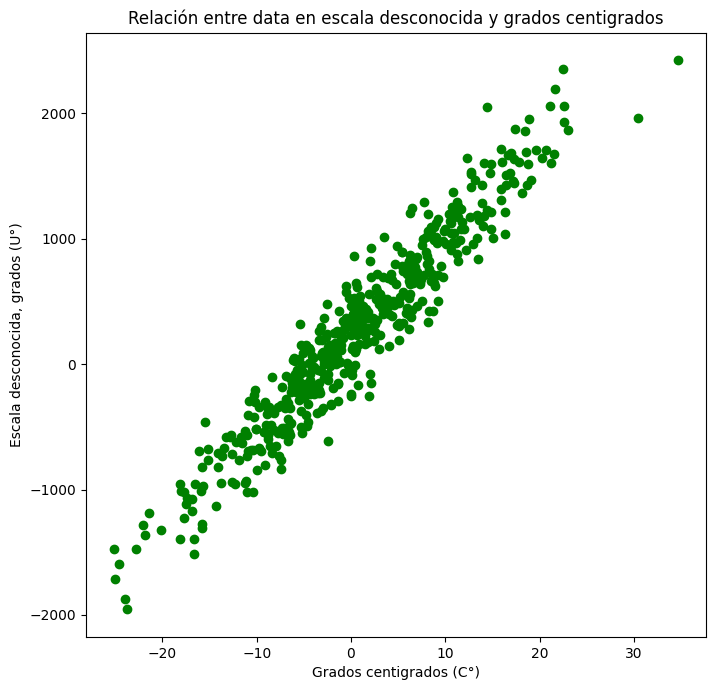

In [ ]:

fig = plt.figure(figsize=(8, 8), dpi = 100)
plt.scatter(X,Y, color = "green")
plt.title("Relación entre data en escala desconocida y grados centigrados")
plt.xlabel("Grados centigrados (C°)")
plt.ylabel("Escala desconocida, grados (U°)")
plt.show()


Dimensiones de la data

In [ ]:
#Dataset
X_data = X.reshape((500,1))
Y_data = Y.reshape((500,1))
print(X_data.shape)
print(Y_data.shape)


(500, 1)
(500, 1)


# Partición de la Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.30, random_state=9)

In [ ]:
# Visualización de las dimensiones de la partición

m_train = X_train.shape[0]
m_test = X_test.shape[0]

print ("Numero de ejemplos de entrenamiento: m_train = " + str(m_train))
print ("Numero de ejemplos de test: m_test = " + str(m_test))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

Numero de ejemplos de entrenamiento: m_train = 350
Numero de ejemplos de test: m_test = 150
X_train shape: (350, 1)
Y_train shape: (350, 1)
X_test shape: (150, 1)
Y_test shape: (150, 1)


## Visualización del split

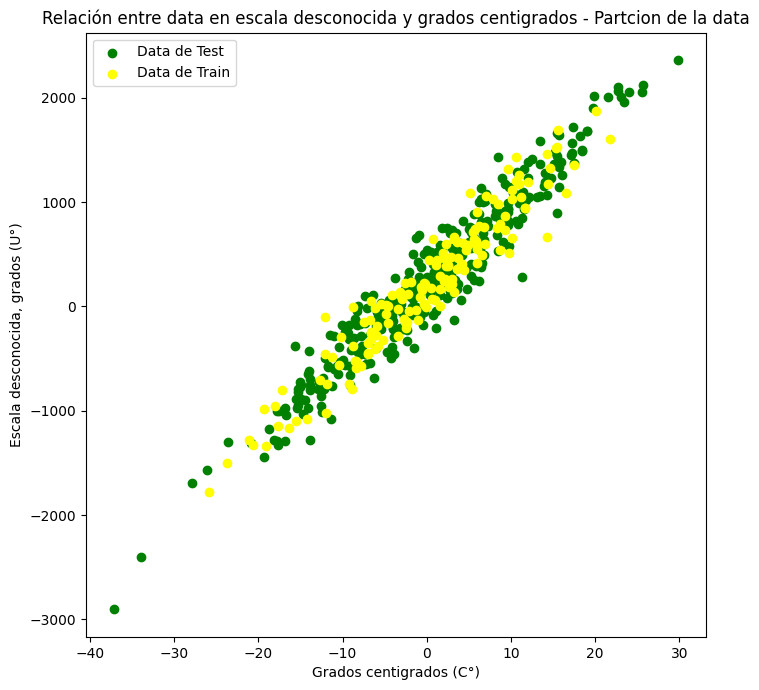

In [ ]:
fig = plt.figure(figsize=(8, 8), dpi = 100)
plt.scatter(X_train,Y_train, color = "green", label ="Data de Test")
plt.scatter(X_test,Y_test, color = "yellow", label ="Data de Train")
plt.title("Relación entre data en escala desconocida y grados centigrados - Partcion de la data")
plt.xlabel("Grados centigrados (C°)")
plt.ylabel("Escala desconocida, grados (U°)")
plt.legend()
plt.show()

# Regresión Lineal Univariable

In [ ]:
# Inicialización aleatoria

def initialize_random():
        
    w = randint(-50,50)
    b = randint(-50,50)

    assert(isinstance(b, float) or isinstance(b, int))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [ ]:
dim = 2
w, b = initialize_random()
print ("w = " + str(w))
print ("b = " + str(b))

w = 16
b = -38


In [ ]:
# Función para la propagación

def propagate(w, b, X, Y):
    
    m = X.shape[0]
    
    # Propagación hacia adelante
    A = w*X+b    # la función de activación 
    cost = np.sum((A-Y)**2)/(2*m)  # calculo del costo

    # Backprop
    dw = np.sum(np.multiply(A-Y,X))/m
    db = np.sum(A-Y)/m

    assert(dw.dtype == float)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [ ]:
w, b, X_1, Y_1 = 2, 2, np.array([[1.,2.,-1.]]).T, np.array([[1,0,1]]).T
grads, cost = propagate(w, b, X_1, Y_1)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))



dw = 5.333333333333333
db = 2.6666666666666665
cost = 7.666666666666667


In [ ]:
#Función para el calculo del coste y optimización

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = True):
        
    costs = []
    
    for i in range(num_iterations):
                
        # Costo y calculo de los gradientes
        grads, cost = propagate(w, b, X, Y) 
        
        # Obtener las derivadas del diccionario grads
        dw = grads["dw"]
        db = grads["db"]
        
        # Regla de actualizacion de los parametros w y b
        w = w-learning_rate*dw
        b = b-learning_rate*db
        
        # Record del costo cada 100 iteraciones
        if i % 100 == 0:
            costs.append(cost)
        
        # Print cada 100 iteraciones en el entrenamiento
        if print_cost and i % 100 == 0:
            print ("Costo después de la iteración número %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [ ]:
params, grads, costs = optimize(w, b, X_1, Y_1, num_iterations= 1000, learning_rate = 0000.1, print_cost = True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Costo después de la iteración número 0: 0.568489
Costo después de la iteración número 100: 0.047620
Costo después de la iteración número 200: 0.047619
Costo después de la iteración número 300: 0.047619
Costo después de la iteración número 400: 0.047619
Costo después de la iteración número 500: 0.047619
Costo después de la iteración número 600: 0.047619
Costo después de la iteración número 700: 0.047619
Costo después de la iteración número 800: 0.047619
Costo después de la iteración número 900: 0.047619
w = -0.2857142857142853
b = 0.8571428571428563
dw = 2.220446049250313e-16
db = -5.551115123125783e-16


In [ ]:
# Funcion de predicción

def predict(w, b, X):
        
    m = X.shape[0]
    Y_prediction = w*X+b      
     
    assert(Y_prediction.shape == (m,1))
    
    return Y_prediction

In [ ]:
w = 0.1124579
b = -0.3
X = np.array([[1.,-1.1,-3.2]]).T
print ("predictions = " + str(predict(w, b, X)))

predictions = [[-0.1875421 ]
 [-0.42370369]
 [-0.65986528]]


In [ ]:
# Modelo integrado

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    
      
    # Inicialización aleatoria
    w, b = initialize_random()

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Obtención de los valores w y b del diccionario "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predicion del conjuto test/train para todo el batch
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)   

    # Print train/test accuracy
    print(f"train accuracy: {100*(1 - np.sum((Y_train-Y_prediction_train)**2)/np.sum((Y_train-np.mean(Y_train))**2))} %")
    print(f"test accuracy: {100*(1 - np.sum((Y_test-Y_prediction_test)**2)/np.sum((Y_test-np.mean(Y_test))**2))} %")

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

# Prueba del modelo

In [ ]:
d = model(X_train, Y_train, X_test, Y_test, num_iterations = 5000, learning_rate = 0.005, print_cost = False)
print("Costo final: "+str(d["costs"][-1]))


train accuracy: 93.31878544282843 %
test accuracy: 92.37585769817342 %
Costo final: 21605.45945000449


# Resultados Gráficos

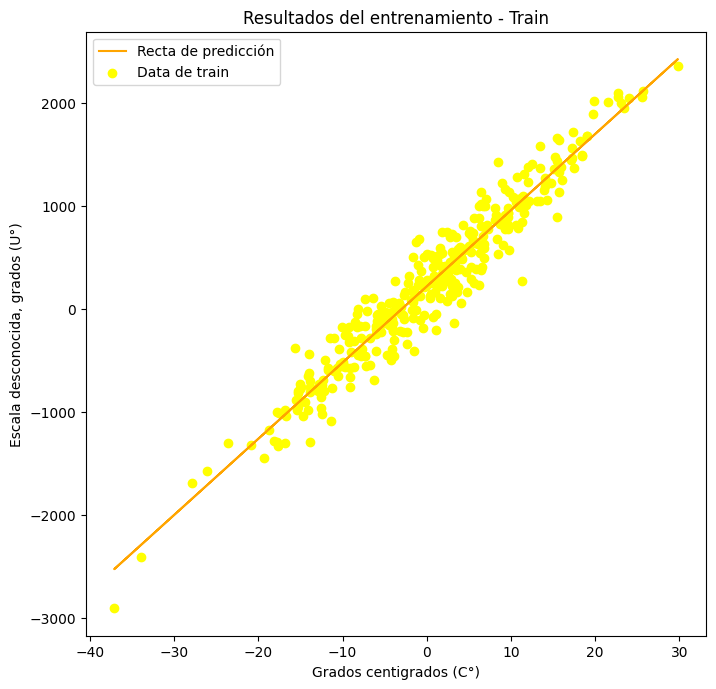

In [ ]:
fig = plt.figure(figsize=(8, 8), dpi = 100)
plt.plot(X_train, d["Y_prediction_train"], color = "orange", label = "Recta de predicción")
plt.scatter(X_train,Y_train, color = "yellow", label= "Data de train")
plt.legend()
plt.title("Resultados del entrenamiento - Train")
plt.xlabel("Grados centigrados (C°)")
plt.ylabel("Escala desconocida, grados (U°)")
plt.show()

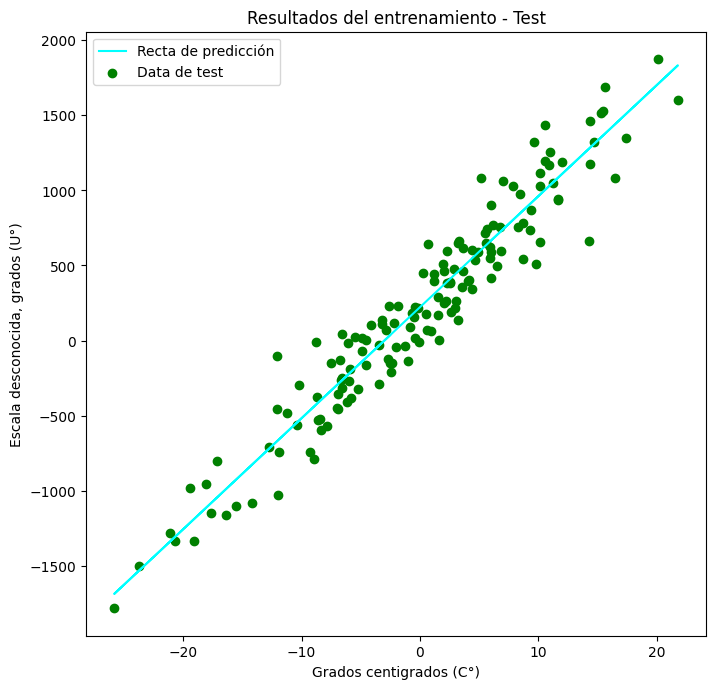

In [ ]:
fig = plt.figure(figsize=(8, 8), dpi = 100)
plt.plot(X_test, d["Y_prediction_test"], color = "cyan", label = "Recta de predicción")
plt.scatter(X_test,Y_test, color = "green", label= "Data de test")
plt.legend()
plt.title("Resultados del entrenamiento - Test")
plt.xlabel("Grados centigrados (C°)")
plt.ylabel("Escala desconocida, grados (U°)")
plt.show()

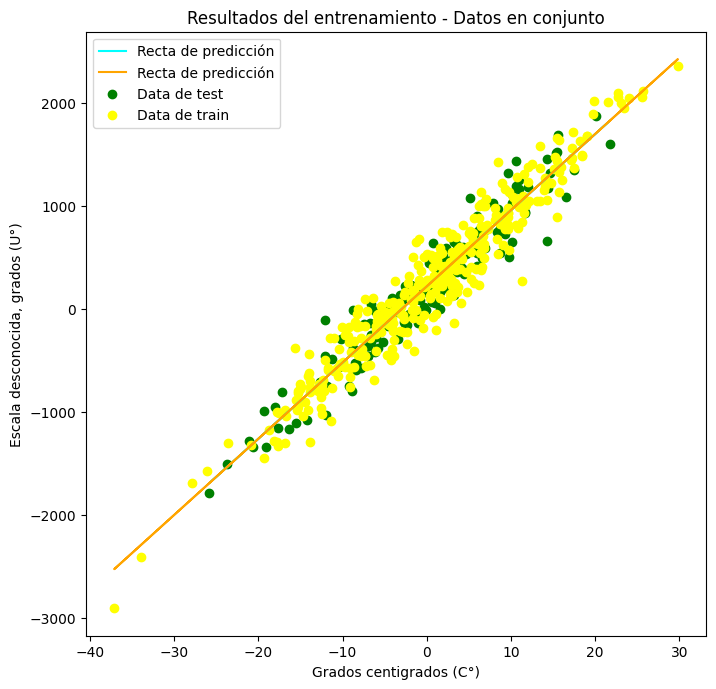

In [ ]:
#Es la misma recta xD
fig = plt.figure(figsize=(8, 8), dpi = 100)
plt.plot(X_test, d["Y_prediction_test"], color = "cyan", label = "Recta de predicción")
plt.scatter(X_test,Y_test, color = "green", label= "Data de test")
plt.plot(X_train, d["Y_prediction_train"], color = "orange", label = "Recta de predicción")
plt.scatter(X_train,Y_train, color = "yellow", label= "Data de train")
plt.legend()
plt.title("Resultados del entrenamiento - Datos en conjunto")
plt.xlabel("Grados centigrados (C°)")
plt.ylabel("Escala desconocida, grados (U°)")
plt.show()

# Comprobación con sklearn

In [ ]:
#Con Sklearn
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train )
Y_pred = reg.predict(X_test)
reg.score(X_test, Y_test)


0.9237585769815564

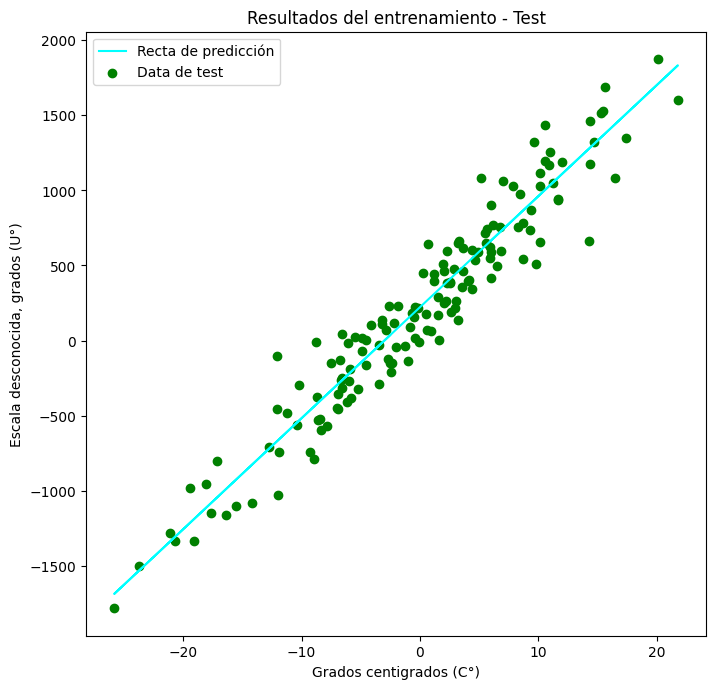

In [ ]:
fig = plt.figure(figsize=(8, 8), dpi = 100)
plt.plot(X_test, Y_pred, color = "cyan", label = "Recta de predicción")
plt.scatter(X_test,Y_test, color = "green", label= "Data de test")
plt.legend()
plt.title("Resultados del entrenamiento - Test")
plt.xlabel("Grados centigrados (C°)")
plt.ylabel("Escala desconocida, grados (U°)")
plt.show()